# Example Tensorflow Basics For Image Recognition Notebook

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


(-0.5, 63.5, 63.5, -0.5)

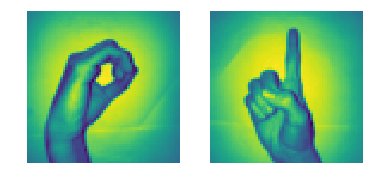

In [2]:
# load data set
%matplotlib inline
x_l = np.load(r'C:\Users\Dylan\AnacondaProjects\Inputs\Sign-language-digits-dataset\X.npy')
Y_l = np.load(r'C:\Users\Dylan\AnacondaProjects\Inputs\Sign-language-digits-dataset\Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [3]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [6]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [7]:
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [8]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)

In [9]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

In [10]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [11]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [12]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


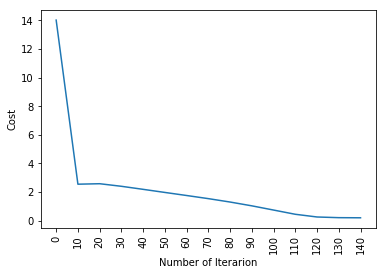

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [13]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [14]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


In [15]:
#clean and restructure data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

In [16]:
import tensorflow as tf

cfg = tf.ConfigProto(allow_soft_placement = True)

#stop tf from being greedy with gpu memory

#can use either:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

#or:
#config = tf.ConfigProto()
#config.gpu_options.allow_growth=True
#sess = tf.Session(config=config)

In [17]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [18]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
232/232 [==============================] - 1s 3ms/step - loss: 0.6930 - acc: 0.5086
Epoch 2/100
232/232 [==============================] - 0s 125us/step - loss: 0.6920 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 106us/step - loss: 0.6911 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 121us/step - loss: 0.6895 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 108us/step - loss: 0.6893 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 112us/step - loss: 0.6873 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 110us/step - loss: 0.6868 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 116us/step - loss: 0.6863 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 116us/step - loss: 0.6853 - acc: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 112us/step - loss: 0.6844 - acc: 0.5431
Epoch 11/100
232/232 

232/232 [==============================] - 0s 106us/step - loss: 0.2736 - acc: 0.9526
Epoch 84/100
232/232 [==============================] - 0s 108us/step - loss: 0.2772 - acc: 0.9526
Epoch 85/100
232/232 [==============================] - 0s 99us/step - loss: 0.2731 - acc: 0.9655
Epoch 86/100
232/232 [==============================] - 0s 106us/step - loss: 0.2697 - acc: 0.9483
Epoch 87/100
232/232 [==============================] - 0s 97us/step - loss: 0.2667 - acc: 0.9483
Epoch 88/100
232/232 [==============================] - 0s 101us/step - loss: 0.2675 - acc: 0.9655
Epoch 89/100
232/232 [==============================] - 0s 97us/step - loss: 0.2672 - acc: 0.9526
Epoch 90/100
232/232 [==============================] - 0s 97us/step - loss: 0.2649 - acc: 0.9698
Epoch 91/100
232/232 [==============================] - 0s 108us/step - loss: 0.2548 - acc: 0.9612
Epoch 92/100
232/232 [==============================] - 0s 119us/step - loss: 0.2557 - acc: 0.9526
Epoch 93/100
232/232 [=====

232/232 [==============================] - 0s 106us/step - loss: 0.3378 - acc: 0.9612
Epoch 66/100
232/232 [==============================] - 0s 127us/step - loss: 0.3294 - acc: 0.9224
Epoch 67/100
232/232 [==============================] - 0s 121us/step - loss: 0.3202 - acc: 0.9698
Epoch 68/100
232/232 [==============================] - 0s 108us/step - loss: 0.3198 - acc: 0.9310
Epoch 69/100
232/232 [==============================] - 0s 114us/step - loss: 0.3104 - acc: 0.9741
Epoch 70/100
232/232 [==============================] - 0s 119us/step - loss: 0.3022 - acc: 0.9612
Epoch 71/100
232/232 [==============================] - 0s 119us/step - loss: 0.2974 - acc: 0.9698
Epoch 72/100
232/232 [==============================] - 0s 112us/step - loss: 0.2978 - acc: 0.9698
Epoch 73/100
232/232 [==============================] - 0s 108us/step - loss: 0.2961 - acc: 0.9741
Epoch 74/100
232/232 [==============================] - 0s 108us/step - loss: 0.3009 - acc: 0.9612
Epoch 75/100
232/232 [=

232/232 [==============================] - 0s 121us/step - loss: 0.1267 - acc: 0.9526
Epoch 48/100
232/232 [==============================] - 0s 185us/step - loss: 0.1319 - acc: 0.9526
Epoch 49/100
232/232 [==============================] - 0s 168us/step - loss: 0.1097 - acc: 0.9612
Epoch 50/100
232/232 [==============================] - 0s 162us/step - loss: 0.1011 - acc: 0.9784
Epoch 51/100
232/232 [==============================] - 0s 142us/step - loss: 0.0962 - acc: 0.9741
Epoch 52/100
232/232 [==============================] - 0s 123us/step - loss: 0.0924 - acc: 0.9741
Epoch 53/100
232/232 [==============================] - 0s 121us/step - loss: 0.0925 - acc: 0.9655
Epoch 54/100
232/232 [==============================] - 0s 138us/step - loss: 0.0914 - acc: 0.9741
Epoch 55/100
232/232 [==============================] - 0s 162us/step - loss: 0.0904 - acc: 0.9741
Epoch 56/100
232/232 [==============================] - 0s 164us/step - loss: 0.0873 - acc: 0.9655
Epoch 57/100
232/232 [=

In [21]:
type(x_l)

numpy.ndarray

In [20]:
plt.imshow(x_l[260].reshape(144, 144))

ValueError: cannot reshape array of size 4096 into shape (144,144)

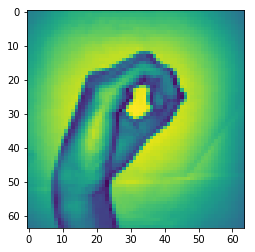

In [22]:
plt.imshow(x_l[260])

In [23]:
x_l[260].shape

(64, 64)